##Importaciones

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

##Cargar los datos

Dataset X

In [0]:
# Leer el archivo csv
df_x = pd.read_csv('/Workspace/Users/nicolayc@outlook.com/X.csv')

# Aplicar formato fecha
df_x['Date'] = pd.to_datetime(df_x['Date'])

display(df_x.head())

Date,Price
2024-04-04T00:00:00Z,89.18
2024-04-03T00:00:00Z,89.35
2024-04-02T00:00:00Z,88.92
2024-04-01T00:00:00Z,87.42
2024-03-28T00:00:00Z,87.48


Dataset Y

In [0]:
# Leer el archivo csv (delimitador ";")
df_y = pd.read_csv('/Workspace/Users/nicolayc@outlook.com/Y.csv', delimiter=';')

# Aplicar formato fecha
df_y['Date'] = pd.to_datetime(df_y['Date'])

display(df_y.head())

/root/.ipykernel/1100/command-7564070703946715-3386190653:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_y['Date'] = pd.to_datetime(df_y['Date'])


Date,Price
2023-12-09T00:00:00Z,547.33
2023-11-09T00:00:00Z,546.0
2023-08-09T00:00:00Z,545.0
2023-07-09T00:00:00Z,550.0
2023-06-09T00:00:00Z,552.5


Dataset Z

In [0]:
# Leer el archivo csv
df_z = pd.read_csv('/Workspace/Users/nicolayc@outlook.com/Z.csv')

# Aplicar formato fecha
df_z['Date'] = pd.to_datetime(df_z['Date'])

# Cambiar orden de columnas
df_z = df_z[['Date', 'Price']]

display(df_x.head(10))

Date,Price
2024-04-04T00:00:00Z,89.18
2024-04-03T00:00:00Z,89.35
2024-04-02T00:00:00Z,88.92
2024-04-01T00:00:00Z,87.42
2024-03-28T00:00:00Z,87.48
2024-03-27T00:00:00Z,86.09
2024-03-26T00:00:00Z,86.25
2024-03-25T00:00:00Z,86.75
2024-03-22T00:00:00Z,85.43
2024-03-21T00:00:00Z,85.78


## Filtrar por fechas

In [0]:
start_date = '2010-01-01'
end_date = '2023-12-31'

df_x = df_x[(df_x['Date'] >= start_date) & (df_x['Date'] <= end_date)]
df_y = df_y[(df_y['Date'] >= start_date) & (df_y['Date'] <= end_date)]
df_z = df_z[(df_z['Date'] >= start_date) & (df_z['Date'] <= end_date)]

display(df_x.head())
display(df_y.head())
display(df_z.head())

Date,Price
2023-12-29T00:00:00Z,77.04
2023-12-28T00:00:00Z,78.39
2023-12-27T00:00:00Z,79.65
2023-12-26T00:00:00Z,81.07
2023-12-22T00:00:00Z,79.07


Date,Price
2023-12-09T00:00:00Z,547.33
2023-11-09T00:00:00Z,546.0
2023-08-09T00:00:00Z,545.0
2023-07-09T00:00:00Z,550.0
2023-06-09T00:00:00Z,552.5


Date,Price
2010-01-01T00:00:00Z,2225.25
2010-01-04T00:00:00Z,2225.25
2010-01-05T00:00:00Z,2246.5
2010-01-06T00:00:00Z,2302.5
2010-01-07T00:00:00Z,2306.5


## Unir los datasets

In [0]:
# Renombrar columnas en cada dataframe
df_x = df_x.rename(columns={'Price': 'Price_X'})
df_y = df_y.rename(columns={'Price': 'Price_Y'})
df_z = df_z.rename(columns={'Price': 'Price_Z'})  

# Asegurar que las columnas finales sean: Date, Price_X / Y / Z
df_x = df_x[['Date', 'Price_X']]
df_y = df_y[['Date', 'Price_Y']]
df_z = df_z[['Date', 'Price_Z']]

In [0]:
# Unir por fecha (outer join)
df = pd.merge(df_x, df_y, on='Date', how='outer')
df = pd.merge(df, df_z, on='Date', how='outer')

# Ordenar por fecha
df = df.sort_values('Date')
display(df.head())


Date,Price_X,Price_Y,Price_Z
2010-01-01T00:00:00Z,null,527.5,2225.25
2010-01-02T00:00:00Z,null,542.5,null
2010-01-03T00:00:00Z,null,565.0,null
2010-01-04T00:00:00Z,80.12,645.0,2225.25
2010-01-05T00:00:00Z,80.59,null,2246.5


## Manejo de nulos

In [0]:
for col in ['Price_X', 'Price_Y', 'Price_Z']:
    df[col] = df[col].fillna(df[col].mean())
display(df.head())

Date,Price_X,Price_Y,Price_Z
2010-01-01T00:00:00Z,78.259540802213,527.5,2225.25
2010-01-02T00:00:00Z,78.259540802213,542.5,2037.0811969871695
2010-01-03T00:00:00Z,78.259540802213,565.0,2037.0811969871695
2010-01-04T00:00:00Z,80.12,645.0,2225.25
2010-01-05T00:00:00Z,80.59,555.3524608501119,2246.5


## Calcular el precio estimado de los equipos

In [0]:
# Equipo 1: 20% de materia prima X y 80% de materia prima Y
df['Precio_E1'] = 0.20 * df['Price_X'] + 0.80 * df['Price_Y']
# Equipo 2: conformado por las 3 materias primas X,Y y Z en partes iguales
df['Precio_E2'] = (df['Price_X'] + df['Price_Y'] + df['Price_Z']) / 3


In [0]:
# DataFrame para Precio_E1
df_e1 = df[['Date', 'Precio_E1']].copy()

# DataFrame para Precio_E2
df_e2 = df[['Date', 'Precio_E2']].copy()

# Mostrar ambos
display(df_e1.head())
display(df_e2.head())

Date,Precio_E1
2010-01-01T00:00:00Z,437.6519081604426
2010-01-02T00:00:00Z,449.6519081604426
2010-01-03T00:00:00Z,467.6519081604426
2010-01-04T00:00:00Z,532.024
2010-01-05T00:00:00Z,460.39996868008956


Date,Precio_E2
2010-01-01T00:00:00Z,943.669846934071
2010-01-02T00:00:00Z,885.946912596461
2010-01-03T00:00:00Z,893.446912596461
2010-01-04T00:00:00Z,983.4566666666666
2010-01-05T00:00:00Z,960.8141536167041


In [0]:
# Frecuencia mensual
# # df_e1: columnas ['Date', 'Precio_E1']
df_e1 = df_e1.set_index('Date').resample('M').mean()
# df_e2: columnas ['Date', 'Precio_E2']
df_e2 = df_e2.set_index('Date').resample('M').mean()

## Modelo para la proyección

In [0]:
# Modelo SARIMA para Precio_E1
model_e1 = SARIMAX(df_e1['Precio_E1'], order=(1,1,1), seasonal_order=(1,1,1,12))
result_e1 = model_e1.fit()

# Modelo SARIMA para Precio_E2
model_e2 = SARIMAX(df_e2['Precio_E2'], order=(1,1,1), seasonal_order=(1,1,1,12))
result_e2 = model_e2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16006D+00    |proj g|=  5.71624D-02

At iterate    5    f=  4.08179D+00    |proj g|=  9.04728D-02


 This problem is unconstrained.



At iterate   10    f=  4.03869D+00    |proj g|=  1.87295D-02

At iterate   15    f=  4.03836D+00    |proj g|=  1.19913D-04

At iterate   20    f=  4.03835D+00    |proj g|=  2.42870D-03

At iterate   25    f=  4.03828D+00    |proj g|=  1.45286D-03

At iterate   30    f=  4.03826D+00    |proj g|=  9.61460D-04

At iterate   35    f=  4.03825D+00    |proj g|=  3.32011D-04

At iterate   40    f=  4.03825D+00    |proj g|=  4.04383D-05

At iterate   45    f=  4.03825D+00    |proj g|=  2.48470D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     56      1     0     0   3.412D-05   4.038D+00
  F =   4.03825023691

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76102D+00    |proj g|=  3.16354D-02

At iterate    5    f=  4.74732D+00    |proj g|=  9.07494D-03

At iterate   10    f=  4.65205D+00    |proj g|=  2.42981D-02

At iterate   15    f=  4.64856D+00    |proj g|=  3.31432D-03

At iterate   20    f=  4.64818D+00    |proj g|=  1.35862D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     31      1     0     0   8.712D-06   4.648D+00
  F =   4.6481742637569301     

CONVERG

## Proyección

In [0]:
# Forecast 36 meses adelante
forecast_e1 = result_e1.get_forecast(steps=36)
forecast_e2 = result_e2.get_forecast(steps=36)

# Extraer predicciones
pred_e1 = forecast_e1.predicted_mean
pred_e2 = forecast_e2.predicted_mean

# Crear índice de fechas futuras
future_dates = pd.date_range(start=df_e1.index[-1] + pd.DateOffset(months=1), periods=36, freq='M')

# Crear DataFrames con proyecciones
projection_e1 = pd.DataFrame({'Date': future_dates, 'Precio_E1_proyectado': pred_e1.values})
projection_e2 = pd.DataFrame({'Date': future_dates, 'Precio_E2_proyectado': pred_e2.values})


## Visualización

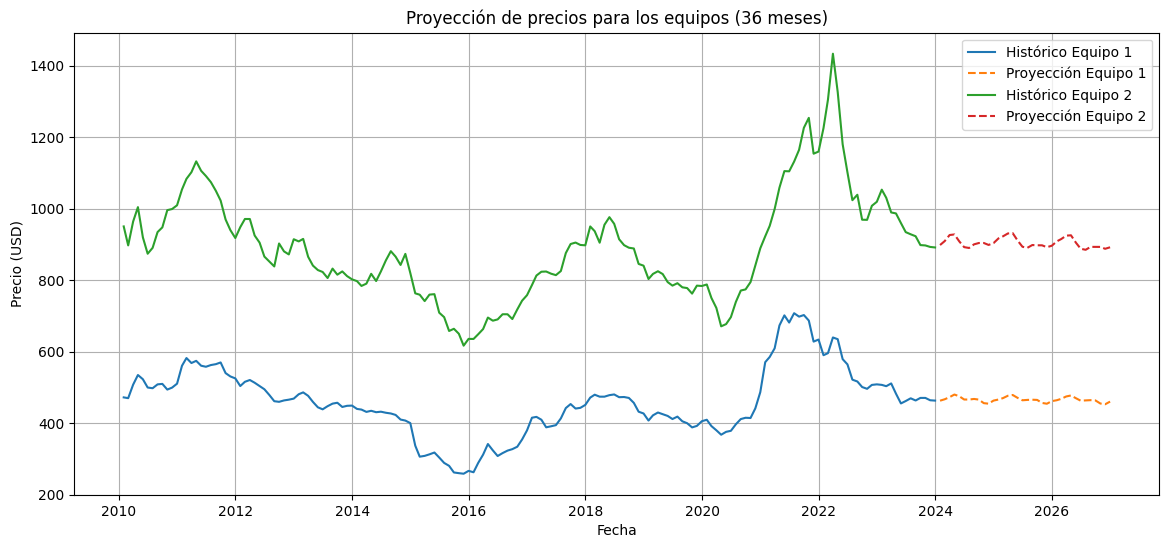

In [0]:
plt.figure(figsize=(14, 6))

# Equipo 1
plt.plot(df_e1.index, df_e1['Precio_E1'], label='Histórico Equipo 1')
plt.plot(projection_e1['Date'], projection_e1['Precio_E1_proyectado'], '--', label='Proyección Equipo 1')

# Equipo 2
plt.plot(df_e2.index, df_e2['Precio_E2'], label='Histórico Equipo 2')
plt.plot(projection_e2['Date'], projection_e2['Precio_E2_proyectado'], '--', label='Proyección Equipo 2')

plt.title("Proyección de precios para los equipos (36 meses)")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.grid(True)
plt.show()
